# Data Preparation and Processing

In [121]:

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


In [122]:

train_samples = []
train_labels = []

In [123]:

for i in range(50):
    # 5% of younger individuals with side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # 5% of older individuals with no side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(950):
    # 95% of younger individuals with no side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # 5% of older individuals with no side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [124]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

# for i in scaled_train_samples:
#     print(i)

# Sequential Model

### Quesetions: 
1. What is overfitting?
   - Overfitting occurs when a model has learned the specific features of the training set really well. But has a difficult time generalizing on data it hasn't seen before. 
2. How do you know if a model is overfitting?
   - A model can be said to be overfitting when it gives good result on the traning set but less than good results for the validation set.
3. Given a confusion matrix, how do you get the accuracy rate?
   - A confusion matrix visualizes the predictability performance of a model by contrasting the predicted values with the true values. In a confusion matrix, values which has the same predicted value and true value can be seen in the diagonal (top-right to bottom-left). A possible formula to solve for the accuracy rate would be the sum of corrected predictions divided by the total number of data in a dataset. 

In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [126]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(f"num GPUs available: {len(physical_devices)}")

num GPUs available: 1


In [127]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [128]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                32        
                                                                 
 dense_25 (Dense)            (None, 32)                544       
                                                                 
 dense_26 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [130]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
180/180 - 4s - loss: 0.6513 - accuracy: 0.5461 - val_loss: 0.6327 - val_accuracy: 0.6000 - 4s/epoch - 20ms/step
Epoch 2/30
180/180 - 1s - loss: 0.6263 - accuracy: 0.6411 - val_loss: 0.6039 - val_accuracy: 0.7000 - 865ms/epoch - 5ms/step
Epoch 3/30
180/180 - 1s - loss: 0.5991 - accuracy: 0.7067 - val_loss: 0.5743 - val_accuracy: 0.7300 - 883ms/epoch - 5ms/step
Epoch 4/30
180/180 - 1s - loss: 0.5723 - accuracy: 0.7483 - val_loss: 0.5427 - val_accuracy: 0.7600 - 848ms/epoch - 5ms/step
Epoch 5/30
180/180 - 1s - loss: 0.5443 - accuracy: 0.7794 - val_loss: 0.5102 - val_accuracy: 0.8100 - 1s/epoch - 6ms/step
Epoch 6/30
180/180 - 1s - loss: 0.5159 - accuracy: 0.8144 - val_loss: 0.4778 - val_accuracy: 0.8350 - 853ms/epoch - 5ms/step
Epoch 7/30
180/180 - 1s - loss: 0.4883 - accuracy: 0.8228 - val_loss: 0.4456 - val_accuracy: 0.8750 - 711ms/epoch - 4ms/step
Epoch 8/30
180/180 - 1s - loss: 0.4618 - accuracy: 0.8550 - val_loss: 0.4145 - val_accuracy: 0.8800 - 835ms/epoch - 5ms/step
Epoch

## Predict

In [131]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [132]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [133]:
# for i in rounded_predictions:
#     print(i)

## Confusion Matrix

In [134]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [135]:
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")

Confusion matrix, without normalization
[[906  94]
 [ 47 953]]


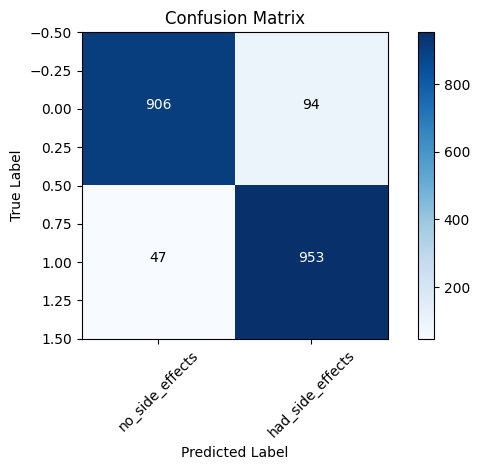

In [137]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

### Save and load via save() and load_model() 

In [138]:
import os.path

if os.path.isfile("models/medical_trial_model.h5") is False:
    model.save("models/medical_trial_model.h5")

In [139]:
from tensorflow.keras.models import load_model

new_model = load_model("models/medical_trial_model.h5")

In [140]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                32        
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
new_model.get_weights()

[array([[ 4.6325305e-01,  3.1432922e-03, -5.6383443e-01,  7.4118358e-01,
         -1.2553703e-04,  2.2450484e-01,  1.8113997e-02, -3.3429223e-01,
         -8.0712140e-02, -1.8692800e-01,  3.4027630e-01, -1.3178766e-02,
         -3.0731857e-02,  3.0221432e-01,  2.3514515e-01, -6.5958954e-02]],
       dtype=float32),
 array([-0.11802693, -0.00401397,  0.        , -0.0890365 , -0.00156181,
        -0.0719038 ,  0.20106632,  0.        ,  0.        ,  0.        ,
        -0.08355032,  0.        ,  0.        , -0.07368755, -0.07163728,
         0.17211945], dtype=float32),
 array([[-3.84802110e-02,  5.32948375e-01, -4.51351963e-02,
         -1.53167844e-01, -8.43551904e-02,  1.97985262e-01,
          3.27136040e-01,  3.43243152e-01, -4.65535074e-01,
          2.93156117e-01, -2.27095559e-01, -1.18880913e-01,
         -3.44537348e-01, -2.77445614e-01, -3.43215838e-02,
         -8.21474716e-02,  4.88950431e-01, -1.47525996e-01,
          1.26986861e-01, -3.35516632e-02, -4.30693328e-01,
      

In [142]:
new_model.optimizer

### Save and load using to_json() and model_from_json() (only saves architecture, not weights)

In [143]:
# Save as json
json_string = model.to_json()

# Save as yaml (no longer works)
# yaml_string = model.to_yaml()

In [144]:
json_string

# yaml_string

'{"class_name": "Sequential", "config": {"name": "sequential_8", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_24_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_24", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "co

In [145]:
# model reconstruction using json
from tensorflow.keras.models import model_from_json
model_architecture_from_json = model_from_json(json_string)

# model reconstruction using yaml (no longer works)
# from tensorflow.keras.models import model_from_yaml
# model_architecture_from_yaml = model_from_yaml(yaml_string)

In [146]:
model_architecture_from_json.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                32        
                                                                 
 dense_25 (Dense)            (None, 32)                544       
                                                                 
 dense_26 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Save and load weights with save_weights() and load_weights() (only saves weight, does not save architecture)

In [147]:
import os.path
if os.path.isfile("models/my_model_weights.h5") is False:
    model.save_weights("models/my_model_weights.h5")

In [148]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [149]:
model2.load_weights("models/my_model_weights.h5")

In [150]:
model2.get_weights()

[array([[ 4.6325305e-01,  3.1432922e-03, -5.6383443e-01,  7.4118358e-01,
         -1.2553703e-04,  2.2450484e-01,  1.8113997e-02, -3.3429223e-01,
         -8.0712140e-02, -1.8692800e-01,  3.4027630e-01, -1.3178766e-02,
         -3.0731857e-02,  3.0221432e-01,  2.3514515e-01, -6.5958954e-02]],
       dtype=float32),
 array([-0.11802693, -0.00401397,  0.        , -0.0890365 , -0.00156181,
        -0.0719038 ,  0.20106632,  0.        ,  0.        ,  0.        ,
        -0.08355032,  0.        ,  0.        , -0.07368755, -0.07163728,
         0.17211945], dtype=float32),
 array([[-3.84802110e-02,  5.32948375e-01, -4.51351963e-02,
         -1.53167844e-01, -8.43551904e-02,  1.97985262e-01,
          3.27136040e-01,  3.43243152e-01, -4.65535074e-01,
          2.93156117e-01, -2.27095559e-01, -1.18880913e-01,
         -3.44537348e-01, -2.77445614e-01, -3.43215838e-02,
         -8.21474716e-02,  4.88950431e-01, -1.47525996e-01,
          1.26986861e-01, -3.35516632e-02, -4.30693328e-01,
      